In [4]:
import pandas as pd
import numpy as np 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# ignore the warnings 
import warnings
warnings.filterwarnings('ignore')

In [8]:
data  =  datasets.load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
df  =  pd.DataFrame(data['data'], columns=['Petal Length','Petal Width', 'Sepal Length', 'Sepal Width'])

In [11]:
df.head()

,Petal Length,Petal Width,Sepal Length,Sepal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# setosa, versicolor, virginica 

In [12]:
df['species'] =  data['target']

In [13]:
df['species'] = df['species'].apply(lambda x: data['target_names'][x])

In [17]:
df.tail()

,Petal Length,Petal Width,Sepal Length,Sepal Width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [18]:
df.isnull().sum()

Petal Length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
species         0
dtype: int64

In [19]:
df.describe()

,Petal Length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


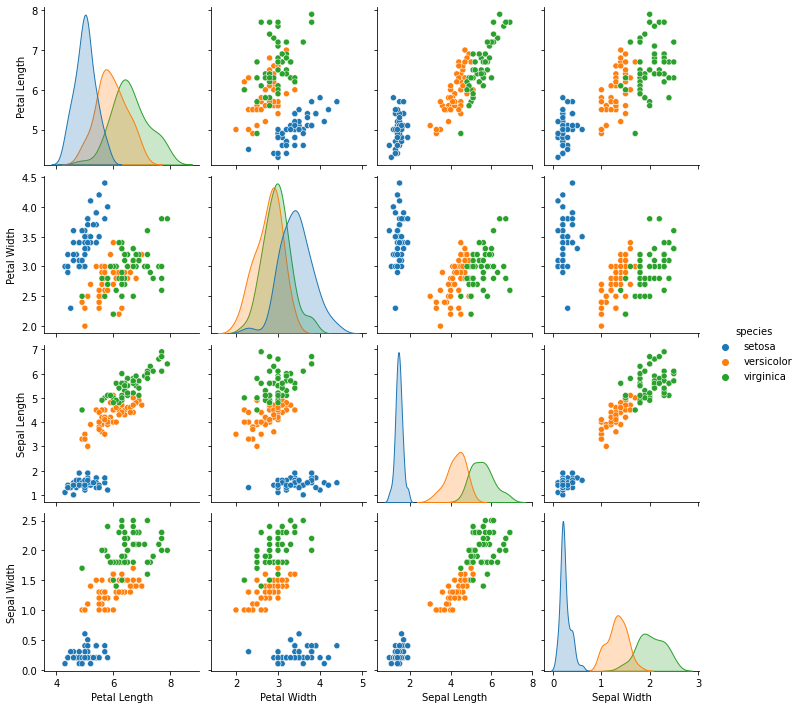

In [20]:
# correlation 

# pairplot

sns.pairplot(df, hue='species')
plt.show()

[]

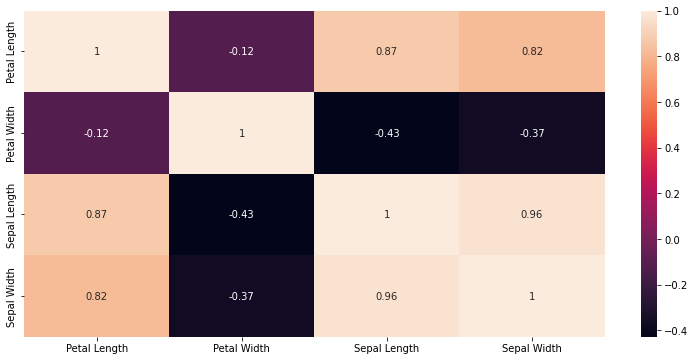

In [23]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(), annot=True)
plt.plot()

<AxesSubplot:xlabel='species', ylabel='Petal Width'>

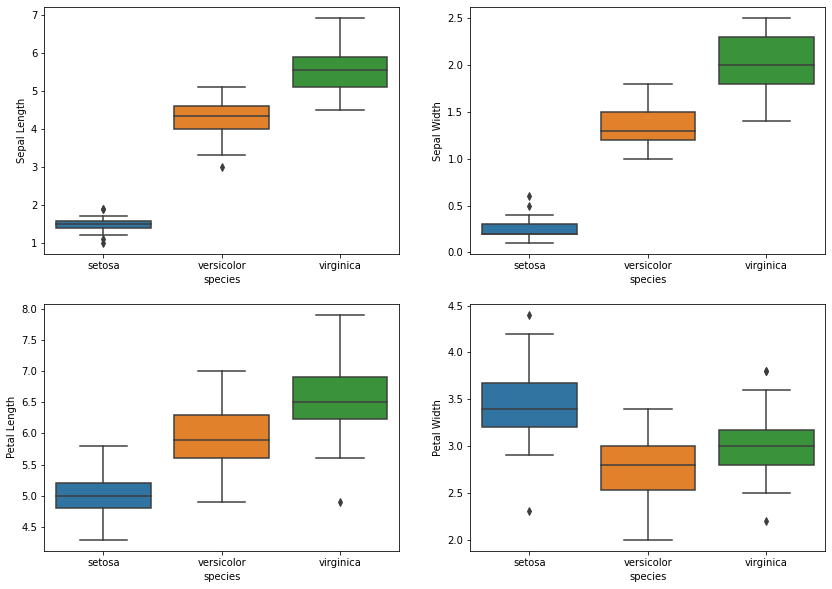

In [28]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='Sepal Length', data =df)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='Sepal Width', data =df)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='Petal Length', data =df)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='Petal Width', data =df)

In [36]:
# splitting

X  =  df[['Petal Length', 'Petal Width', 'Sepal Length', 'Sepal Width']].values
Y  =  df['species'].values

X_train, X_test, Y_train, Y_test =  train_test_split(X,Y, train_size=0.9, random_state=0)

In [37]:
df.columns

Index(['Petal Length', 'Petal Width', 'Sepal Length', 'Sepal Width',
       'species'],
      dtype='object')

In [38]:
dt  =  tree.DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [39]:

prediction = dt.predict(X_test)

In [40]:
prediction

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor'], dtype=object)

In [41]:
# performance evaluation

print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [42]:
dt.score(X_test,Y_test)


1.0

In [43]:
Y_pred =  dt.predict(X_test)

In [45]:
from sklearn import metrics
print('Accuracy score: ', metrics.accuracy_score(Y_test, Y_pred))

Accuracy score:  1.0


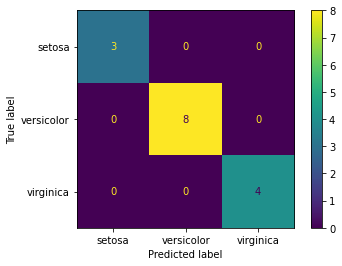

In [46]:
plot_confusion_matrix(dt, X_test, Y_test)

In [47]:
!pip install pydotplus

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for pydotplus, since package 'wheel' is not installed.
    Running setup.py install for pydotplus: started
    Running setup.py install for pydotplus: finished with status 'done'


You should consider upgrading via the 'C:\Users\Digital Suppliers\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [48]:
!pip install graphviz

You should consider upgrading via the 'C:\Users\Digital Suppliers\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [50]:
import six 
import sys 

sys.modules['sklearn.externals.six'] = six


In [51]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus




In [54]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [55]:
dot_data  = StringIO()

export_graphviz(dt, out_file=dot_data, feature_names=data.feature_names, filled = True, rounded=True,special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [56]:
from sklearn import tree

In [57]:
X = [[0,0],[2,2]]
Y = [0.5,2.5]

In [58]:
dtreg  =  tree.DecisionTreeRegressor()

In [59]:
dtreg = dtreg.fit(X,Y)

In [60]:
dtreg.predict([[1,2]])

array([0.5])